<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi! My name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. 


</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    
<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
   
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">

**Reviewer's comment v2:**

Hey I loved what you did with this submission! It's looking great and I'm approving it!

Looking forward to reviewing your future projects!

Good luck!

</div>

## Initialization

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

Good Seed has requested help in creating a model to verify ages of customers buying alcohol.  They have provided data with image-label pairs to train the model.  We will be perfroming EDA to identify age distributions and outliers, then training the model using the ResNet50 framework.

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
#first look at label data
df_labels = pd.read_csv('/datasets/faces/labels.csv')
print(df_labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


In [3]:
#description of label data
display(df_labels['file_name'].head())
display(df_labels['real_age'].describe())

0    000000.jpg
1    000001.jpg
2    000002.jpg
3    000003.jpg
4    000004.jpg
Name: file_name, dtype: object

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [4]:
#duplicates and missing values in labels
print(df_labels.isnull().sum())
print(df_labels.duplicated().sum())

file_name    0
real_age     0
dtype: int64
0


In [5]:
#loading picture folder
train_datagen = ImageDataGenerator(rescale=1/255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df_labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


## EDA

29.0


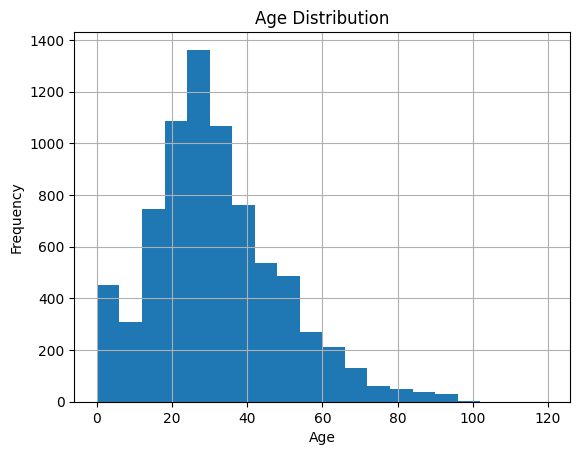

In [22]:
#age distribution
print(df_labels['real_age'].median())
df_labels['real_age'].hist(bins=20, range=(0, 120))

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()                           

It appears the age distribution peaks at 29 within the 20-41 age range.  Small spike at 0-5 in

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment  </b>
    

Good job! Don't forget to add titles and axis labels so that the reader could easily understand what's going on in this graph. It is also a good habit to leave some comments under each graph. We do our job for the client and he or she may not understand the graph at all. That's why we need titels, labels and comments :)

    
You can use the following piece of code:    
</div>

```python

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

```

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
Fixed. 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">

**Reviewer's comment v2:**

Looking awesome

</div>

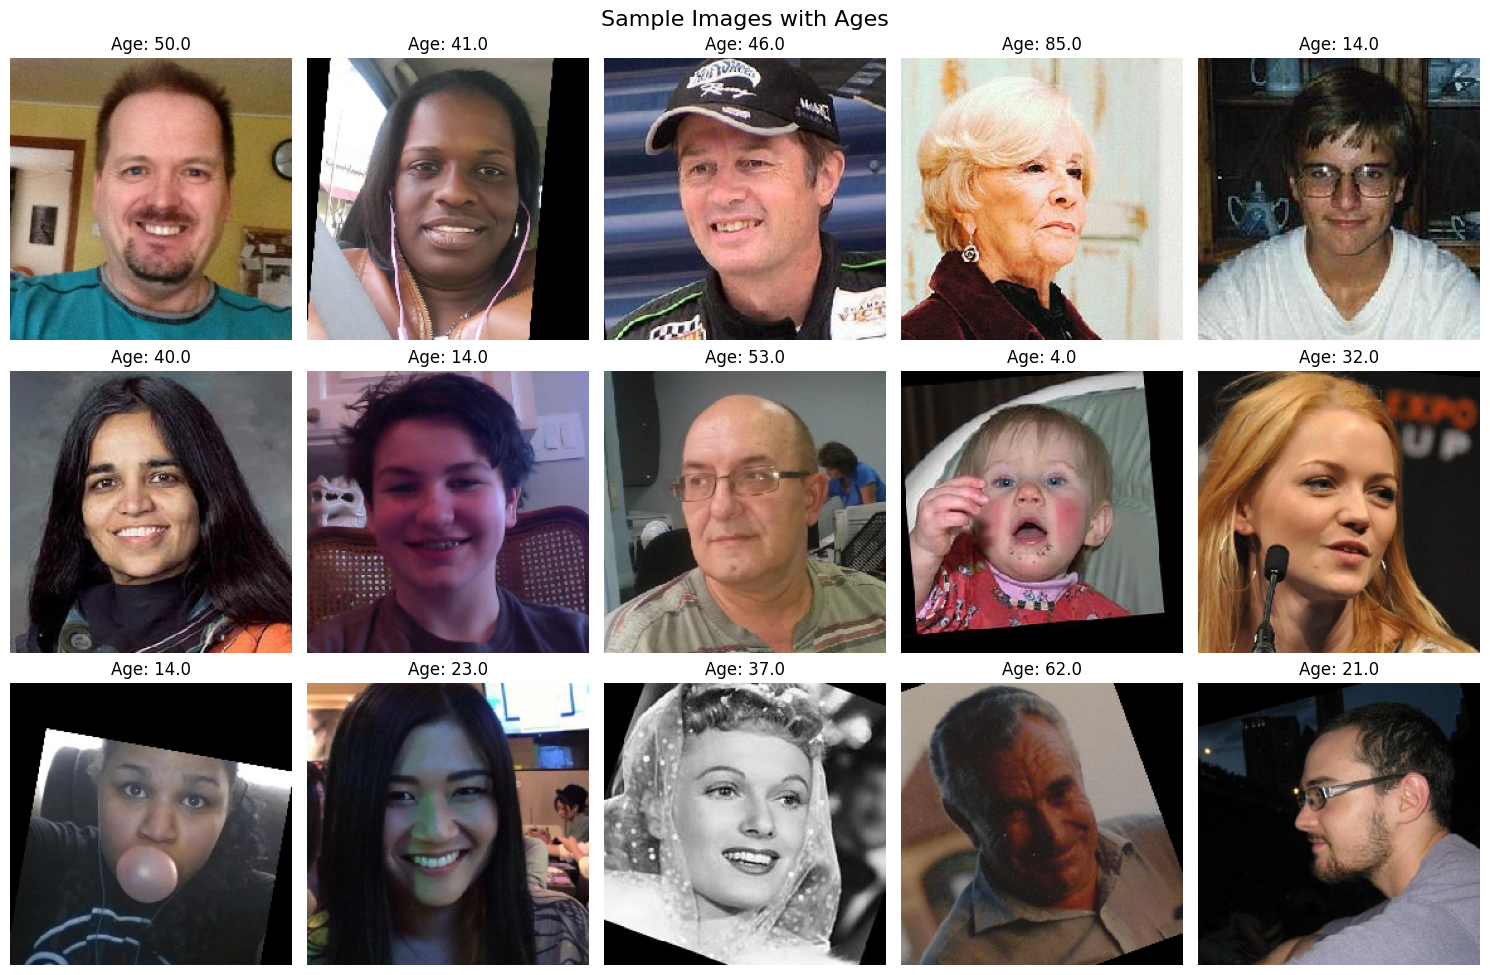

Batch shape: (32, 224, 224, 3)
Age range in this batch: 4.0 - 94.0
Mean age in this batch: 35.5


In [7]:
#10-15 samples of different ages
sample_batch = next(train_gen_flow)
images, ages = sample_batch
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Sample Images with Ages', fontsize=16)

for i in range(15):
    row = i // 5
    col = i % 5
    
    axes[row, col].imshow(images[i])
    axes[row, col].set_title(f'Age: {ages[i]:.1f}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print(f"Batch shape: {images.shape}")
print(f"Age range in this batch: {ages.min():.1f} - {ages.max():.1f}")
print(f"Mean age in this batch: {ages.mean():.1f}")

### Findings

The dataset contains 7,591 pictures and 7,591 corresponding age labels.  The median age label is 29, inside a range of 4-100, with most picture-labels inside the distribution of 20-41.  

Looking at the sample of 15 pictures, we can see a wide range of angles, color pallettes, brightness, contrast, and shadows that will necessitate augmentation to effectively train the model to identify and attribute age labels to the correct photos.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good conclusion.
</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [8]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import joblib

In [27]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    df_labels = pd.read_csv(path)
    
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255, vertical_flip=False)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df_labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='training')
# place your code here

    return train_gen_flow

In [28]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    df_labels = pd.read_csv(path)
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255, vertical_flip=False)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=df_labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345,
        subset='validation')    
    # place your code here

    return test_gen_flow

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please complete the code for both functions. 

</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
Completed. 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">

**Reviewer's comment v2:**

Awesome job!

</div>

In [11]:
def create_model(input_shape):

    """
    It defines the model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# place your code here

    return model

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
    
- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
# place your code here

    return model

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [13]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')


### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921

Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035

Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454

Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481

Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192

Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332

Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359

Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239

Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529

Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629

Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866

Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591

Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467

Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401

Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841

Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304

Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226

Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908

Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

You can use Markdown cell for your code and results: 

    ```python
    
    # code
    
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921  
```

## Conclusions

Epoch 8/20 356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
Epoch 17/20 356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

The model perfromed best at Epoch 17/20 MAE at 3.2205 and MAE on the validation set at 6.6419.  Epoch 8 also delivered excellent results, but not as high as Epoch 17, with loss values at 37.4804 vs 17.3425.I believe Good Seed with will find this model well suited to their alcohol-age verification needs.  It appears to work for all age groups.  If this model is partnered with a human associate to verify customer age, the risks of the model incorrectly labeling an age-image pair will be mitigated.  A reasonable limit would have to be encoded to ensure customers below the median age (29) and that exhibit features most closely correlating to age-image pairs below the median age are not immediately waived.  

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Very good! 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

In your opinion, are there any other methods we can use to improve quality?
    
</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
A couple of agumentations (RandomBrightness, RandomContrast, etc) could improve quality. Perhaps RandomColorJitter to apply a randomizing effect for brigthness, contrast, saturation, and hue would be concise, but would require refining parameters.
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">

**Reviewer's comment v2:**

Definitely agree with you! looking great!

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training